In [17]:
import findspark
findspark.init()
findspark.find()

'C:\\spark-3.3.1-bin-hadoop2'

In [18]:
# importing the packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import os
import findspark
import py4j
from pyspark.sql import SparkSession

from pyspark.sql.types import *
from pyspark.sql.functions import mean,countDistinct, avg,stddev, col, count, when
import pyspark.sql.functions as F

from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer, OneHotEncoder, StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for plotting

In [25]:
spark = SparkSession.builder.appName("PySpark_Project").getOrCreate()
spark

In [26]:
rnd_seed= 42
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

# Brain Stroke Dataset

In [27]:
b_s = spark.read.csv('C:/Users/NinoOrton-Clarke/Python Sandbox/brain_stroke.csv', inferSchema = True, header = True)
b_s.show()

+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
|Female|79.0|           1|            0|         Yes|Self-employed|         Rural|           174.12|24.0|   never smoked|     1|
|  Male|81.0|           0|            0|         Yes|      Private|         Urban|           186.

# EDA

In [28]:
# Displays raw data
b_s.take(5)

[Row(gender='Male', age=67.0, hypertension=0, heart_disease=1, ever_married='Yes', work_type='Private', Residence_type='Urban', avg_glucose_level=228.69, bmi=36.6, smoking_status='formerly smoked', stroke=1),
 Row(gender='Male', age=80.0, hypertension=0, heart_disease=1, ever_married='Yes', work_type='Private', Residence_type='Rural', avg_glucose_level=105.92, bmi=32.5, smoking_status='never smoked', stroke=1),
 Row(gender='Female', age=49.0, hypertension=0, heart_disease=0, ever_married='Yes', work_type='Private', Residence_type='Urban', avg_glucose_level=171.23, bmi=34.4, smoking_status='smokes', stroke=1),
 Row(gender='Female', age=79.0, hypertension=1, heart_disease=0, ever_married='Yes', work_type='Self-employed', Residence_type='Rural', avg_glucose_level=174.12, bmi=24.0, smoking_status='never smoked', stroke=1),
 Row(gender='Male', age=81.0, hypertension=0, heart_disease=0, ever_married='Yes', work_type='Private', Residence_type='Urban', avg_glucose_level=186.21, bmi=29.0, smoki

In [29]:
# Take a look at the data showing only the top 3 rows
b_s.show(3)

+------+----+------------+-------------+------------+---------+--------------+-----------------+----+---------------+------+
|gender| age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+------+----+------------+-------------+------------+---------+--------------+-----------------+----+---------------+------+
|  Male|67.0|           0|            1|         Yes|  Private|         Urban|           228.69|36.6|formerly smoked|     1|
|  Male|80.0|           0|            1|         Yes|  Private|         Rural|           105.92|32.5|   never smoked|     1|
|Female|49.0|           0|            0|         Yes|  Private|         Urban|           171.23|34.4|         smokes|     1|
+------+----+------------+-------------+------------+---------+--------------+-----------------+----+---------------+------+
only showing top 3 rows



In [30]:
# Examine column names
b_s.columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [31]:
# Displays columns and datatypes
b_s.printSchema()

root
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [32]:
# displays columns and datatypes in a different format
b_s.dtypes

[('gender', 'string'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'double'),
 ('bmi', 'double'),
 ('smoking_status', 'string'),
 ('stroke', 'int')]

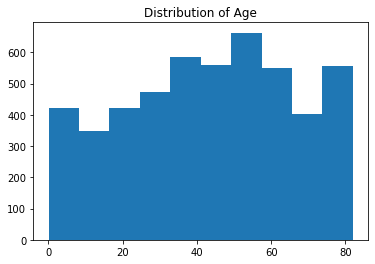

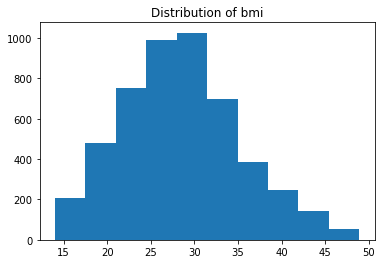

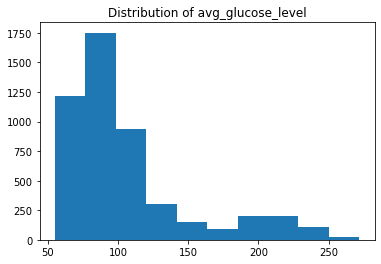

In [33]:
# Displaying the distribution of numerical variables with histplots
cols = ['Age','bmi','avg_glucose_level']

def pyspark_hist(column):
    values = []
    for age in b_s.select(column).collect():
        values.append(age[0])
    plt.figure()
    plt.title(f'Distribution of {column}')
    plt.hist(values)
    plt.show()

for col in cols:
    pyspark_hist(col)

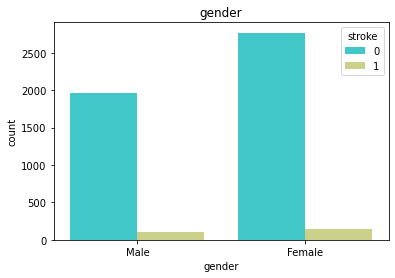

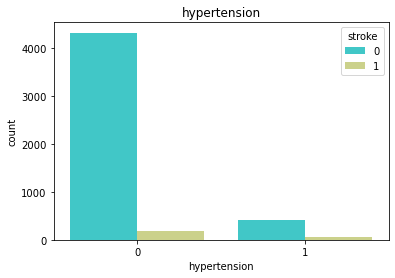

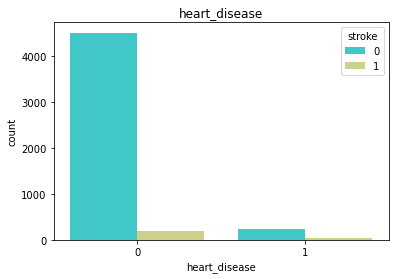

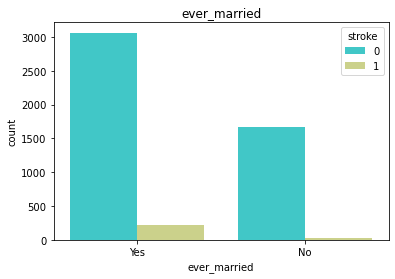

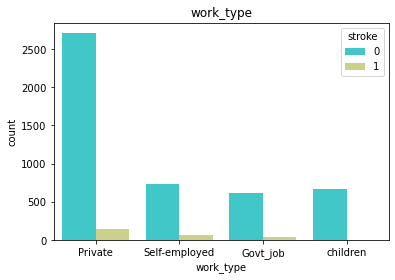

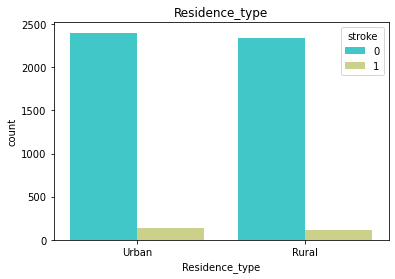

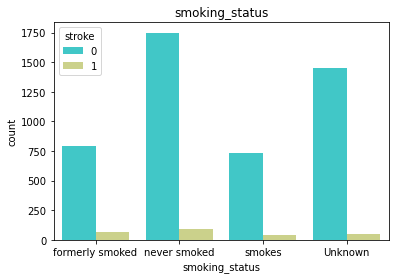

In [34]:
# Visualisation of categorical variables with countplots
import seaborn as sns
b_s_viz = b_s.toPandas()

c_variables = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

for i in range(len(c_variables)):
    plt.figure
    plt.title(c_variables[i])
    sns.countplot(data=b_s_viz,x=c_variables[i],hue='stroke',palette='rainbow')
    plt.show()

# Balancing The Data

Text(0, 0.5, 'count')

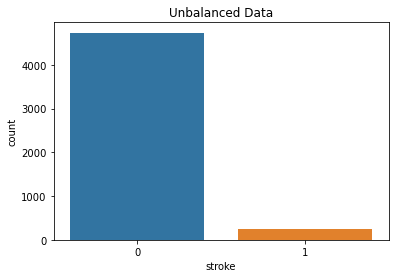

In [35]:
# Visualising the balance in the target variable(y)
b_s_viz = b_s.toPandas()
series = pd.DataFrame(b_s_viz['stroke'].value_counts()).reset_index()
plt.figure()
sns.barplot(data=series,x='index',y='stroke')
plt.title('Unbalanced Data')
plt.xlabel('stroke')
plt.ylabel('count')

In [36]:
# Splitting data into dataset variables and target variable (X and y) for our model
X = b_s_viz.drop('stroke',axis=1)
y = b_s_viz['stroke']

496


(array([248.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 248.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

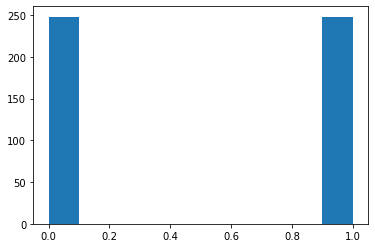

In [37]:
from imblearn.under_sampling import RandomUnderSampler 
undersample = RandomUnderSampler(sampling_strategy = 'majority')
X_under, y_under = undersample.fit_resample(X,y)
print(len(y_under))
plt.hist(y_under)

In [38]:
# Combining the data into a dataset
X_under['stroke'] = y_under
modeldf = X_under

In [39]:
# Converting to PySpark
modeldf = spark.createDataFrame(modeldf)
modeldf.show()

+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|Female|13.0|           0|            0|          No|     children|         Rural|            88.51|27.7|        Unknown|     0|
|Female|1.88|           0|            0|          No|     children|         Rural|           100.74|18.6|        Unknown|     0|
|Female|42.0|           0|            0|         Yes|      Private|         Rural|           107.91|20.5|   never smoked|     0|
|Female|20.0|           0|            0|          No|      Private|         Rural|           102.42|18.6|   never smoked|     0|
|Female|72.0|           1|            1|         Yes|      Private|         Urban|           217.

# Label/One Hot Encoding

In [42]:
variables = ['gender','ever_married','work_type','Residence_type','smoking_status']

from pyspark.ml.feature import StringIndexer
for var in variables:
    label_stringIdx = StringIndexer(inputCol = var, outputCol = f'labelIndex_{var}')
    modeldf = label_stringIdx.fit(modeldf).transform(modeldf)
    modeldf = modeldf.drop(var)

modeldf.show()

+----+------------+-------------+-----------------+----+------+-----------------+-----------------------+--------------------+-------------------------+-------------------------+
| age|hypertension|heart_disease|avg_glucose_level| bmi|stroke|labelIndex_gender|labelIndex_ever_married|labelIndex_work_type|labelIndex_Residence_type|labelIndex_smoking_status|
+----+------------+-------------+-----------------+----+------+-----------------+-----------------------+--------------------+-------------------------+-------------------------+
|13.0|           0|            0|            88.51|27.7|     0|              0.0|                    1.0|                 3.0|                      1.0|                      1.0|
|1.88|           0|            0|           100.74|18.6|     0|              0.0|                    1.0|                 3.0|                      1.0|                      1.0|
|42.0|           0|            0|           107.91|20.5|     0|              0.0|                    0.0|

# Standardising the Data

In [49]:
columns = modeldf.columns
del columns[5]
print(columns)
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Preparing data for the model

# assembler = VectorAssembler(inputCols=columns, outputCol="features")
# modeldf = assembler.transform(modeldf)
# modeldf= MinMaxScaler(inputCol="features", outputCol="features_scaled").fit(modeldf).transform(modeldf)
modeldf.show(5)
# Standardizing the data using Min-max Scaling

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'labelIndex_gender', 'labelIndex_ever_married', 'labelIndex_work_type', 'labelIndex_Residence_type', 'labelIndex_smoking_status', 'features', 'features_scaled']
+----+------------+-------------+-----------------+----+------+-----------------+-----------------------+--------------------+-------------------------+-------------------------+--------------------+--------------------+
| age|hypertension|heart_disease|avg_glucose_level| bmi|stroke|labelIndex_gender|labelIndex_ever_married|labelIndex_work_type|labelIndex_Residence_type|labelIndex_smoking_status|            features|     features_scaled|
+----+------------+-------------+-----------------+----+------+-----------------+-----------------------+--------------------+-------------------------+-------------------------+--------------------+--------------------+
|13.0|           0|            0|            88.51|27.7|     0|              0.0|                    1.0|  

# Splitting The Data

In [50]:
train, test = modeldf.randomSplit([0.8, 0.2], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 394
Test Dataset Count: 102


# Random Forest

In [51]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features_scaled', labelCol = 'stroke')
rf_model = rf.fit(train)
pred = rf_model.transform(test)

In [56]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction")
accuracy = evaluator.evaluate(pred)
print(f"Accuracy = {accuracy}")
print(f"Test Error = {1.0 - accuracy}")

Accuracy = 0.7718569780853517
Test Error = 0.2281430219146483


# DTree

In [58]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features_scaled', labelCol = 'stroke')
dt_model = dt.fit(train)
predict = dt_model.transform(test)

In [59]:
# Evaluating the accuracy of the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction")
accuracy = evaluator.evaluate(predict)
print(f"Accuracy = {accuracy}")
print(f"Test Error = {1.0 - accuracy}")

Accuracy = 0.7445017773191147
Test Error = 0.2554982226808853


# Airplane Crashes Dataset

In [60]:
from datetime import date, timedelta, datetime

In [61]:
plane = spark.read.csv(path='Airplane_Crashes_and_Fatalities_Since_1908.csv', inferSchema=True, header=True)
plane.show(5)

+-----+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+
|index|      Date| Time|            Location|            Operator|Flight #|        Route|                Type|Registration|cn/In|Aboard|Fatalities|Ground|             Summary|
+-----+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+--------------------+
|    0|09/17/1908|17:18| Fort Myer, Virginia|Military - U.S. Army|    null|Demonstration|    Wright Flyer III|        null|    1|   2.0|       1.0|   0.0|During a demonstr...|
|    1|07/12/1912|06:30|AtlantiCity, New ...|Military - U.S. Navy|    null|  Test flight|           Dirigible|        null| null|   5.0|       5.0|   0.0|First U.S. dirigi...|
|    2|08/06/1913| null|Victoria, British...|             Private|       -|         null|    Curtiss seaplane|        nu

# Data Pre-processing

In [63]:
# Dropping irrelevant columns
plane = plane.drop('index','Summary')
plane.show(5)

+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+
|      Date| Time|            Location|            Operator|Flight #|        Route|                Type|Registration|cn/In|Aboard|Fatalities|Ground|
+----------+-----+--------------------+--------------------+--------+-------------+--------------------+------------+-----+------+----------+------+
|09/17/1908|17:18| Fort Myer, Virginia|Military - U.S. Army|    null|Demonstration|    Wright Flyer III|        null|    1|   2.0|       1.0|   0.0|
|07/12/1912|06:30|AtlantiCity, New ...|Military - U.S. Navy|    null|  Test flight|           Dirigible|        null| null|   5.0|       5.0|   0.0|
|08/06/1913| null|Victoria, British...|             Private|       -|         null|    Curtiss seaplane|        null| null|   1.0|       1.0|   0.0|
|09/09/1913|18:30|  Over the North Sea|Military - German...|    null|         null|Zeppelin L-1 (air...|  

# Checking for null data

In [67]:
from pyspark.sql.functions import col,isnan, when, count

plane.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in plane.columns]
   ).show()

print(f'Length of the data set is {plane.count()}')

+----+----+--------+--------+--------+-----+----+------------+-----+------+----------+------+
|Date|Time|Location|Operator|Flight #|Route|Type|Registration|cn/In|Aboard|Fatalities|Ground|
+----+----+--------+--------+--------+-----+----+------------+-----+------+----------+------+
|   0|2219|      20|      18|    4199| 1706|  27|         335| 1228|    22|        12|    22|
+----+----+--------+--------+--------+-----+----+------------+-----+------+----------+------+

Length of the data set is 5268


In [68]:
# Dropping the 'Flight #' column
plane = plane.drop('Flight #')

In [70]:
# Analysing unique values
columns = ['cn/In','Registration','Route','Location']

for col in columns:
    print(f'The number of unique entries in {col} is: {plane.select(col).distinct().count()}')

The number of unique entries in cn/In is: 3708
The number of unique entries in Registration is: 4906
The number of unique entries in Route is: 3245
The number of unique entries in Location is: 4304


In [72]:
for col in columns:
    plane = plane.drop(col)
plane.show(5)

+----------+-----+--------------------+--------------------+------+----------+------+
|      Date| Time|            Operator|                Type|Aboard|Fatalities|Ground|
+----------+-----+--------------------+--------------------+------+----------+------+
|09/17/1908|17:18|Military - U.S. Army|    Wright Flyer III|   2.0|       1.0|   0.0|
|07/12/1912|06:30|Military - U.S. Navy|           Dirigible|   5.0|       5.0|   0.0|
|08/06/1913| null|             Private|    Curtiss seaplane|   1.0|       1.0|   0.0|
|09/09/1913|18:30|Military - German...|Zeppelin L-1 (air...|  20.0|      14.0|   0.0|
|10/17/1913|10:30|Military - German...|Zeppelin L-2 (air...|  30.0|      30.0|   0.0|
+----------+-----+--------------------+--------------------+------+----------+------+
only showing top 5 rows



# Manipulating the Date Column

In [74]:
plane_date = plane.toPandas()

# Changing the date column to a datetime variable
plane_date['Date'] =  pd.to_datetime(plane_date['Date'])

# Extracting the month
plane_date['Month'] = pd.DatetimeIndex(plane_date['Date']).month
# Extracting the year
plane_date['Year'] = pd.DatetimeIndex(plane_date['Date']).year


plane_date = plane_date.drop(['Date','Time'],axis = 1)
plane = spark.createDataFrame(plane_date)

plane.show(5)

+--------------------+--------------------+------+----------+------+-----+----+
|            Operator|                Type|Aboard|Fatalities|Ground|Month|Year|
+--------------------+--------------------+------+----------+------+-----+----+
|Military - U.S. Army|    Wright Flyer III|   2.0|       1.0|   0.0|    9|1908|
|Military - U.S. Navy|           Dirigible|   5.0|       5.0|   0.0|    7|1912|
|             Private|    Curtiss seaplane|   1.0|       1.0|   0.0|    8|1913|
|Military - German...|Zeppelin L-1 (air...|  20.0|      14.0|   0.0|    9|1913|
|Military - German...|Zeppelin L-2 (air...|  30.0|      30.0|   0.0|   10|1913|
+--------------------+--------------------+------+----------+------+-----+----+
only showing top 5 rows



# Checking for Nulls Again

In [76]:
from pyspark.sql.functions import col,isnan, when, count

plane.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in plane.columns]
   ).show()

+--------+----+------+----------+------+-----+----+
|Operator|Type|Aboard|Fatalities|Ground|Month|Year|
+--------+----+------+----------+------+-----+----+
|      18|  27|    22|        12|    22|    0|   0|
+--------+----+------+----------+------+-----+----+



# Removing Leftover Nulls

In [79]:
plane = plane.na.drop(subset=['Operator','Type','Aboard','Fatalities','Ground'])


from pyspark.sql.functions import col,isnan, when, count
# Check the nulls one more time
plane.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in plane.columns]).show()

+--------+----+------+----------+------+-----+----+
|Operator|Type|Aboard|Fatalities|Ground|Month|Year|
+--------+----+------+----------+------+-----+----+
|       0|   0|     0|         0|     0|    0|   0|
+--------+----+------+----------+------+-----+----+



# Label/One Hot Encoding

In [82]:
from pyspark.sql import functions as F

plane = plane.withColumn("Operator", 
    F.when(F.col("Operator").like("%Military%"),F.lit(1)).otherwise(0))

plane = plane.withColumn("Type", 
    F.when(F.col("Type").like("%airship%"),F.lit(1)).otherwise(0))



plane.dropDuplicates(['Operator','Type']).show()

+--------+----+------+----------+------+-----+----+
|Operator|Type|Aboard|Fatalities|Ground|Month|Year|
+--------+----+------+----------+------+-----+----+
|       0|   0|   2.0|       1.0|   0.0|    9|1908|
+--------+----+------+----------+------+-----+----+



# Creating Models

## SLR

In [85]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Aboard'], outputCol = 'features')
plane_model = vectorAssembler.transform(plane)
plane_model = MinMaxScaler(inputCol="features", outputCol="features_scaled").fit(plane_model).transform(plane_model)

plane_model = plane_model.select(['features_scaled', 'Fatalities'])
plane_model.show()

+--------------------+----------+
|     features_scaled|Fatalities|
+--------------------+----------+
|[0.00310559006211...|       1.0|
|[0.00776397515527...|       5.0|
|[0.00155279503105...|       1.0|
|[0.03105590062111...|      14.0|
|[0.04658385093167...|      30.0|
|[0.06366459627329...|      21.0|
|[0.02950310559006...|      19.0|
|[0.03105590062111...|      20.0|
|[0.03416149068322...|      22.0|
|[0.02950310559006...|      19.0|
|[0.04347826086956...|      27.0|
|[0.03105590062111...|      20.0|
|[0.03105590062111...|      20.0|
|[0.03571428571428...|      23.0|
|[0.03260869565217...|      21.0|
|[0.03726708074534...|      24.0|
|[0.02795031055900...|      18.0|
|[0.02795031055900...|      18.0|
|[0.03571428571428...|      23.0|
|[0.03416149068322...|      22.0|
+--------------------+----------+
only showing top 20 rows



## Splitting The Data

In [90]:
split = plane_model.randomSplit([0.7, 0.3])
train = split[0]
test = split[1]

## Creating/Training SLR Model

In [92]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features_scaled', labelCol='Fatalities', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [386.3629671028221]
Intercept: 3.6209244246808248


## Model Scores

In [93]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 21.029072
r2: 0.595967


## MLR

In [96]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Aboard','Operator','Type','Ground','Type','Month','Year'], outputCol = 'features')
plane_model = vectorAssembler.transform(plane)
plane_model = plane_model.select(['features', 'Fatalities'])
plane_model.show()

+--------------------+----------+
|            features|Fatalities|
+--------------------+----------+
|(7,[0,5,6],[2.0,9...|       1.0|
|(7,[0,5,6],[5.0,7...|       5.0|
|(7,[0,5,6],[1.0,8...|       1.0|
|(7,[0,5,6],[20.0,...|      14.0|
|(7,[0,5,6],[30.0,...|      30.0|
|(7,[0,5,6],[41.0,...|      21.0|
|(7,[0,5,6],[19.0,...|      19.0|
|(7,[0,5,6],[20.0,...|      20.0|
|(7,[0,5,6],[22.0,...|      22.0|
|(7,[0,5,6],[19.0,...|      19.0|
|(7,[0,5,6],[28.0,...|      27.0|
|(7,[0,5,6],[20.0,...|      20.0|
|(7,[0,5,6],[20.0,...|      20.0|
|(7,[0,5,6],[23.0,...|      23.0|
|(7,[0,5,6],[21.0,...|      21.0|
|(7,[0,5,6],[24.0,...|      24.0|
|(7,[0,5,6],[18.0,...|      18.0|
|(7,[0,5,6],[18.0,...|      18.0|
|(7,[0,5,6],[23.0,...|      23.0|
|(7,[0,5,6],[22.0,...|      22.0|
+--------------------+----------+
only showing top 20 rows



## Splitting The Data

In [98]:
splits = plane_model.randomSplit([0.7, 0.3])
train = splits[0]
test = splits[1]

## Creating The Model

In [100]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='Fatalities', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.5694923946766118,0.0,0.0,0.007213912524682298,0.0,0.01225862254350313,0.0]
Intercept: 4.296717756877984


## Model Scores

In [101]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 21.576335
r2: 0.562988
